Importing YouTube data and checking for missing values and dropping them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
comments= pd.read_csv("/Users/akash/Downloads/UScomments.csv", on_bad_lines="skip")

/var/folders/cg/gxbtg2cx0pn4wd5qn060p94c0000gn/T/ipykernel_9811/2629433659.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments= pd.read_csv("/Users/akash/Downloads/UScomments.csv", on_bad_lines="skip")


In [4]:
comments.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
type(comments)


pandas.core.frame.DataFrame

In [6]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace= True)

In [8]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

Performing Sentimental Analysis

In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [11]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akash/nltk_data...


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [13]:
sia = SentimentIntensityAnalyzer()

In [14]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [15]:
sia.polarity_scores("MY FAN . attendance")

{'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.4648}

In [16]:
sentiment_scores = []
for comment in comments["comment_text"]:
  score = sia.polarity_scores(str(comment))['compound']
  sentiment_scores.append(score)


In [17]:
sample_df = comments[0:10000]

In [80]:
sentiment_scores[0:10]

[0.0, 0.0, 0.0, 0.4648, 0.0, 0.0, 0.0, 0.0, 0.5719, -0.7717]

In [19]:
comments["Polarity"] = sentiment_scores

In [20]:
comments.head(10)

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.5719
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.7717


Wordcloud Analysis

In [22]:
filter_pos = (comments["Polarity"] >=0.8) & (comments["Polarity"] <= 1.0)

In [23]:
comments[filter_pos]

,video_id,comment_text,likes,replies,Polarity
24,XpVt6Z1Gjjo,I love Logan and Jake so much and thay are so ...,1,0,0.8769
27,XpVt6Z1Gjjo,if you get allot of diss likes do you get on t...,0,0,0.8283
29,XpVt6Z1Gjjo,I love you so much I love to meet you But I li...,0,0,0.9820
45,XpVt6Z1Gjjo,"This looks like a great video, but after you a...",0,0,0.9226
57,XpVt6Z1Gjjo,Congrats Logan love u so much someday I would ...,0,0,0.9337
...,...,...,...,...,...
691312,EoejGgUNmVU,"Fabulous video, just so wonderful live.It's so...",0,0,0.9329
691322,EoejGgUNmVU,I love each and every version of this song. LP...,0,0,0.8402
691324,EoejGgUNmVU,Absolutely fabulous ! LP has the genius to ren...,0,0,0.9397
691345,EoejGgUNmVU,Beautiful LP! You are gorgeous!,0,0,0.8585


In [24]:
comments_positive = comments[filter_pos]

In [25]:
comments_positive.shape

(64310, 5)

In [26]:
filter_neg = (comments["Polarity"] >= -1.0) & (comments["Polarity"] <= -0.8)

In [27]:
comments[filter_neg]

,video_id,comment_text,likes,replies,Polarity
35,XpVt6Z1Gjjo,"Evan is being a douch Logans getting pissed, L...",0,0,-0.9421
63,XpVt6Z1Gjjo,No one fucking cares. You're a 12 year old. Th...,0,0,-0.9005
113,cLdxuaxaQwc,OK guys i get that the word was once used as a...,0,0,-0.9470
114,cLdxuaxaQwc,pewdiepie had nothing to be sorry about. ever...,0,0,-0.8062
115,cLdxuaxaQwc,I think other YouTube's who are hatting at him...,0,0,-0.9457
...,...,...,...,...,...
691254,qRoVlH1OcI4,I swear that Trump supporters would eat warm d...,0,0,-0.8979
691259,qRoVlH1OcI4,there are many reasons for taking a knee to th...,0,0,-0.9065
691262,qRoVlH1OcI4,it's odd to think how many people keep asking ...,0,0,-0.9538
691263,qRoVlH1OcI4,So when we take a knee for fallen soldiers tha...,0,0,-0.8519


In [28]:
comments_negative = comments[filter_neg]

In [29]:
comments_negative.shape

(16148, 5)

In [30]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
comments_positive["comment_text"]

24        I love Logan and Jake so much and thay are so ...
27        if you get allot of diss likes do you get on t...
29        I love you so much I love to meet you But I li...
45        This looks like a great video, but after you a...
57        Congrats Logan love u so much someday I would ...
                                ...                        
691312    Fabulous video, just so wonderful live.It's so...
691322    I love each and every version of this song. LP...
691324    Absolutely fabulous ! LP has the genius to ren...
691345                      Beautiful LP! You are gorgeous!
691356        No comments!  Enjoy!  Thanks!  Nice  weekend!
Name: comment_text, Length: 64310, dtype: object

In [32]:
type(comments_positive["comment_text"])

pandas.core.series.Series

In [33]:
total_positive_commnets = ' '.join(comments_positive["comment_text"])

In [82]:
total_positive_commnets[0:1000]

"I love Logan and Jake so much and thay are so amazing and I look up to them so much 😍💋💙👍 if you get allot of diss likes do you get on the top comments? lets see diss like this please I love you so much I love to meet you But I live in Israel You really inspire me I really like your channel Keep doing what you do\\nBecause everyone loves it and will be Unique and Pashan will be creative and I hope you will see it bye This looks like a great video, but after you are done would you be kind enough to check out my new YouTube channel and give me some feedback? Maybe even subscribing? :) Congrats Logan love u so much someday I would love to meet u #1 fan of the logang ❤️ Well done I LOVE! You so much :D I am very happy for this man and we need to spread more love. United we stand, divided we fall. And this could in all honestly become a good thing for you. You sit on a platform where you could really educate people especially when so many of your fans seem to think it's okay to be said. Rea

In [35]:
from wordcloud import WordCloud , STOPWORDS

In [84]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [37]:
wordcloud_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_commnets)

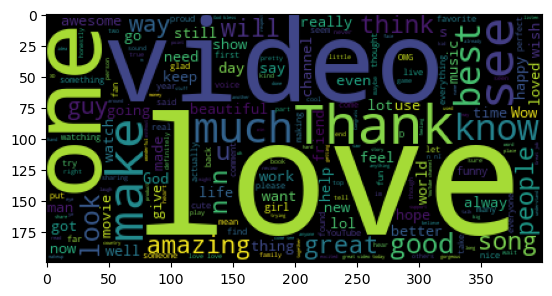

In [38]:
plt.imshow(wordcloud_positive)

In [39]:
total_negative_commnets = ' '.join(comments_negative["comment_text"])

In [85]:
total_negative_commnets[0:1000]

"Evan is being a douch Logans getting pissed, Logan should have went to smash his game system then evan would have cried 😂 & Evans not gonna be able to take care of a pitbull tell his ass no, its gonna kill kong !!! No one fucking cares. You're a 12 year old. There comes a point where you're too old for the whole I'm so goofy and fun every second of every day schtick. Yeah you're impressing douchey 14 year olds who waste their lives on YouTube but to the real world you and your fucktard brother are nothing more than a pair of over privileged, white privileged toddlers. Grow the fuck up man. You think this will be your life forever. One day you're going to face the real world and realize you can't just jump around and scream your way to a real job. Or you can't hair flip your way out of an inevitable date rape charge. OK guys i get that the word was once used as a demeaning term and that the history of that word will never change, yes pewds fucked up but still it quite obviously wasn't 

In [41]:
wordcloud_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_commnets)

(-0.5, 399.5, 199.5, -0.5)

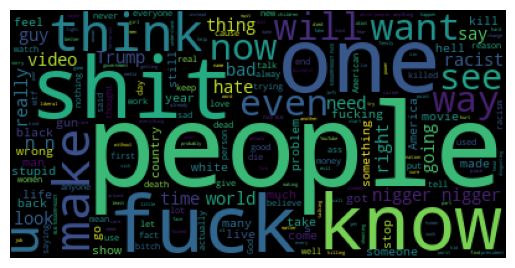

In [42]:
plt.imshow(wordcloud_negative)
plt.axis("off")

Performing Emoji Analysis

In [47]:
pip install emoji==2.14.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 3.1 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [49]:
import emoji

In [51]:
emoji.__version__

'2.14.1'

In [52]:
comments.head(6)

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.4648
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0000


In [56]:
emoji_info= emoji.emoji_list("trending 😉")

In [57]:
emoji_info


[{'match_start': 9, 'match_end': 10, 'emoji': '😉'}]

In [59]:
[items["emoji"]for items in emoji_info]

['😉']

In [60]:
comments["comment_text"]

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [61]:
all_emojis_found = []
for comment in comments["comment_text"]:
    emoji_info= emoji.emoji_list(comment)
    emojis_found= [items["emoji"]for items in emoji_info]
    all_emojis_found.extend(emojis_found)

In [62]:
all_emojis_found[0:10]

['‼️', '‼️', '‼️', '😉', '😭', '👍🏻', '❤️', '😍', '💋', '💙']

In [63]:
len(all_emojis_found)

288867

In [64]:
from collections import Counter

In [66]:
emojis_count_list_top10= Counter(all_emojis_found).most_common(10)

In [67]:
emojis_count_list_top10

[('😂', 36987),
 ('😍', 33453),
 ('❤️', 16911),
 ('❤', 14167),
 ('🔥', 8694),
 ('😭', 8398),
 ('😘', 5545),
 ('💖', 5359),
 ('💕', 5147),
 ('👍', 4251)]

In [69]:
emojis= [emoji for emoji , count in emojis_count_list_top10]

In [70]:
counts= [count for emoji , count in emojis_count_list_top10]

In [71]:
emojis

['😂', '😍', '❤️', '❤', '🔥', '😭', '😘', '💖', '💕', '👍']

In [72]:
counts

[36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]

In [73]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [74]:
import plotly.graph_objs as go
from plotly.offline import iplot


In [75]:
go.Bar(x = emojis , y= counts)

Bar({
    'x': [😂, 😍, ❤️, ❤, 🔥, 😭, 😘, 💖, 💕, 👍],
    'y': [36987, 33453, 16911, 14167, 8694, 8398, 5545, 5359, 5147, 4251]
})

In [86]:
iplot([go.Bar(x = emojis , y= counts)])